# Schoold Data Analysis Report ( April 2017 )

## Schoold application usage and engagement review Report April 2017

Schoold data Analysis for month of April 2017 concluded from two data sets Events and Event Attributes.
Events included in the dataset is limited to a small number of events and attributes related to engagement
with School Profiles in the Schoold App.



In [1]:
#Import libraby to analyse data
import pandas as pd 
import numpy as np
import random as rnd
import seaborn as sns
from datetime import datetime, timedelta
from sklearn import datasets, linear_model

#data visualization
import matplotlib.pyplot as plt
from IPython.display import display
%matplotlib inline


## Condensing the Event and Event Attributes Data

Check structure of the dataset to see if there's any data wrangling need to perform

Data Load file events.csv & events_attributes.csv

In [2]:
# data load
event_dt = pd.read_csv('/Users/shruti/Documents/schoold/events.csv')

In [3]:
display(event_dt.head())

,app_type,at,birthdate_timestamp,city_name,country,device_new,device_uuid,name,uuid,nth
0,ios,2017-04-17 20:21:45,2017-03-25 17:00:15,NaN,ca,False,2a2a64fab6090dd89a7e25e9359fd590f66e2320,sessionStart,01169cea82324edecfd8163bb84bc6327c6bb33c,98.0
1,android,2017-04-17 23:57:13,2016-11-15 01:06:37,NaN,ma,False,3047623a25ebcc9e6d3ed67e58fb890f4966dfc7,sessionStart,0116c632043b642af3c1fe9009767bb00ef2637a,203.0
2,ios,2017-04-22 01:33:16,2017-03-26 04:20:43,NaN,us,False,d030cfdeb3f7cb8212135ea6d28ef6ebf579d0df,sessionStart,01170055acaf764e616d66c1046abe186e52722d,18.0
3,android,2017-04-17 20:12:51,2017-04-17 20:07:37,NaN,us,True,a98b9c6909cc8647ab7b7d112efe1232fa42b924,schoolCardPinningEvent,011700e9f19d9579164cbbfecaec48431df3bde9,1.0
4,ios,2017-04-25 19:37:42,2017-04-22 01:50:13,NaN,us,False,de8a4b7771942c67780c826c108556d43ad58178,schoolProfilePinningEvent,011732c281f93c2e305252cb4e46551e4cfbe8dc,12.0


There is lots of NaN value in City_name which need to be replace but during analysis city_name not consider for any 
analysis that is why not replace with more revelant data.

In [6]:
# Load Event_attributes dataset
eventAtt_dt = pd.read_csv('/Users/shruti/Documents/schoold/events_attributes.csv')

#Display data to review
display(eventAtt_dt.head())

,at,event_name,field_name,uuid,value
0,2017-04-01 00:00:00,schoolProfileLanded,schoolId,5a52decac7dc03867868e8803ad103d683abeb84,121691
1,2017-04-01 00:00:00,schoolProfileLanded,schoolName,5a52decac7dc03867868e8803ad103d683abeb84,University of Redlands
2,2017-04-01 00:00:00,schoolProfileLanded,parentType,5a52decac7dc03867868e8803ad103d683abeb84,mySchools
3,2017-04-01 00:00:03,schoolProfileMajorButtonTapped,schoolName,3d161aa9c74f22f64f9ac17a4346b07e3574116a,Muskingum University
4,2017-04-01 00:00:03,schoolProfileMajorButtonTapped,schoolId,3d161aa9c74f22f64f9ac17a4346b07e3574116a,204264


### Data Cleaning and wragling event_attribute dataset 

In Event attributes data set there is some values with "-1" which are not right so its replaced with more revelant 
data value like "other" university. 
There is none NaN value in event Attributes data set as check below

In [7]:
#Event value -1 replace with other (Clean dataset)
eventAtt_dt.replace("-1", "other", 3)
#check event attributes data is there any null value 
eventAtt_dt.isnull()

,at,event_name,field_name,uuid,value
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
5,False,False,False,False,False
6,False,False,False,False,False
7,False,False,False,False,False
8,False,False,False,False,False
9,False,False,False,False,False


In dataset column - "at" (datetimestamp) is in date and time format so its conver to date format for easy exploration)

In [8]:
event_dt['at'] = event_dt['at'].apply(lambda x : pd.to_datetime(str(x)))
event_dt['dates'] = event_dt['at'].dt.date

In [9]:
eventAtt_dt['at'] = eventAtt_dt['at'].apply(lambda x : pd.to_datetime(str(x)))
eventAtt_dt['dates'] = eventAtt_dt['at'].dt.date

converting datatypeof nth column from float to string 

In [8]:
eventAtt_dt.head()

,at,event_name,field_name,uuid,value
0,2017-04-01 00:00:00,schoolProfileLanded,schoolId,5a52decac7dc03867868e8803ad103d683abeb84,121691
1,2017-04-01 00:00:00,schoolProfileLanded,schoolName,5a52decac7dc03867868e8803ad103d683abeb84,University of Redlands
2,2017-04-01 00:00:00,schoolProfileLanded,parentType,5a52decac7dc03867868e8803ad103d683abeb84,mySchools
3,2017-04-01 00:00:03,schoolProfileMajorButtonTapped,schoolName,3d161aa9c74f22f64f9ac17a4346b07e3574116a,Muskingum University
4,2017-04-01 00:00:03,schoolProfileMajorButtonTapped,schoolId,3d161aa9c74f22f64f9ac17a4346b07e3574116a,204264


### Exploratory Data Analysis

Total row in event dataset

In [6]:
event_dt.shape

(517661, 10)

Total row in event attributes dataset

In [7]:
eventAtt_dt.shape

(968592, 5)

data as per event types in event dataset & Event_attributes dataset

In [8]:
print(event_dt.name.value_counts(dropna=False)).to_frame()

                                  name
schoolProfileLanded             233761
sessionStart                    161385
schoolProfileMajorButtonTapped   75006
schoolProfilePinningEvent        24152
schoolCardPinningEvent           22279
schoolProfileShareButtonTapped    1078


In [9]:
print(eventAtt_dt.event_name.value_counts(dropna=False)).to_frame()

                                event_name
schoolProfileLanded                 701283
schoolProfileMajorButtonTapped      150012
schoolCardPinningEvent               66837
schoolProfilePinningEvent            48304
schoolProfileShareButtonTapped        2156


In [10]:
print('types of field and its count')
print(eventAtt_dt.field_name.value_counts(dropna=False)).to_frame()

types of field and its count
            field_name
schoolName      356276
schoolId        356276
parentType      256040


### Performing Analysis for April 2017

Question 1. Provide a visualization shows Daily Active Users over time, broken down by platform (Android and iOS).


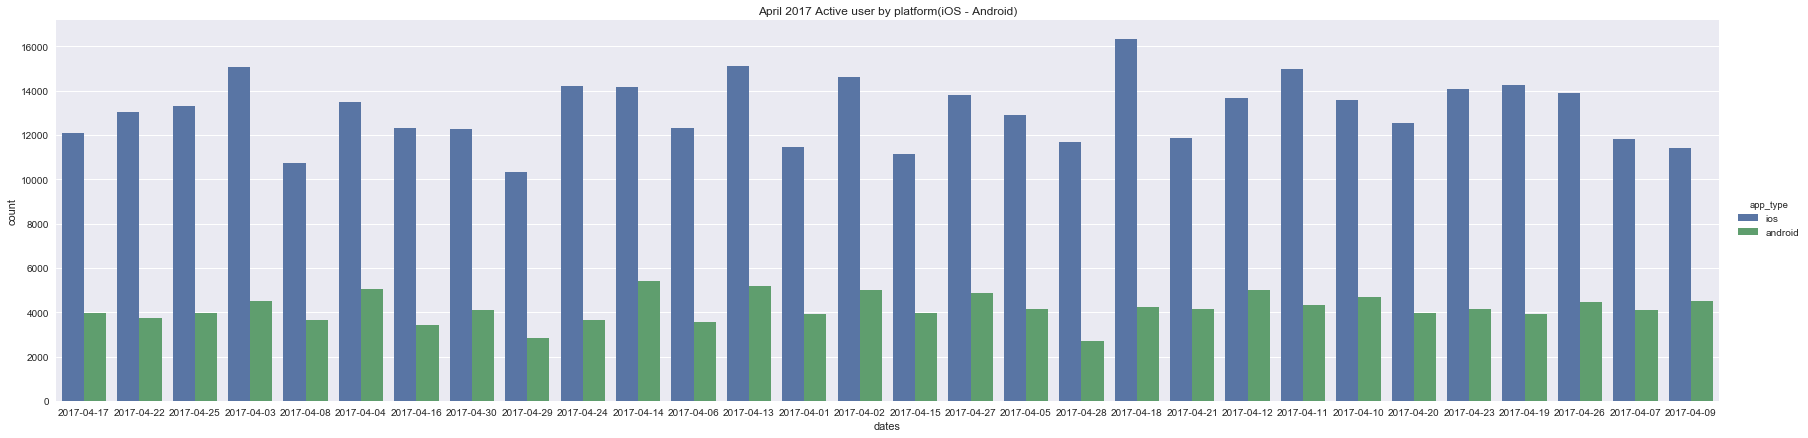

In [14]:
sns.factorplot('dates', data=event_dt, kind='count', hue='app_type',size = 6, aspect = 4)
plt.title('April 2017 Active user by platform(iOS - Android)')

As per above Visualization represents iOS users are extenticely higher then Android mobile user to excess Schoold application

Question 2. Compile a list of the Top Ten most popular Schools in the Schoold App in April based on the data provided.

a. Provide the steps and reasoning you took to carry out this analysis.

To get top ten most popupar University grouped data as per field name using groups.keys() to gropus specifically as "schoolName" which gives school data (Name Constraint).That group of school further grouped by value from where we get only list of University name dataset.
conunt of those value on fieldname gives list of all university with total count for month of april. 
from that used nlargest() to get top ten.

Reason to carry out this way to fatch total count of schools because schools are sub category of fieldname (school name & value). using groupby()make it possible to get revelent data and need to conunt each and every click to get total count.
because highest count represents popularity. 

In [15]:
print('Top Ten Most Popular Schools @ Schood App')

eventAtt_dt.groupby(['field_name']).groups.keys() 
len(eventAtt_dt.groupby(['field_name']).groups['schoolName'])
eventAtt_dt[eventAtt_dt['field_name']== 'schoolName'].groupby('value')['field_name'].count().nlargest(10)



Top Ten Most Popular Schools @ Schood App


value
Harvard University                             8200
Stanford University                            7336
New York University                            6162
University of California-Los Angeles           6024
Columbia University in the City of New York    4524
University of Pennsylvania                     4409
University of Southern California              4387
University of California-Berkeley              3555
Yale University                                3501
Massachusetts Institute of Technology          3440
Name: field_name, dtype: int64

b. What additional data may you need to provide a more accurate assessment, and how would you use that data?
    
For futher accurate assessment need additional data like activity detail,review data for satisfactory result they achieved or not? also average student landed successfully in their expected university is match with this popularity list and much more 

Question 3. For the top four popular schools, provide a useful visualization of daily engagement numbers with their profile using the available data. Note any interesting trends you see, if any.

In [16]:
sub_uni = eventAtt_dt[(eventAtt_dt.value == 'Harvard University') | (eventAtt_dt.value == 'Stanford University') | (eventAtt_dt.value == 'New York University') | (eventAtt_dt.value == 'University of California-Los Angeles')]

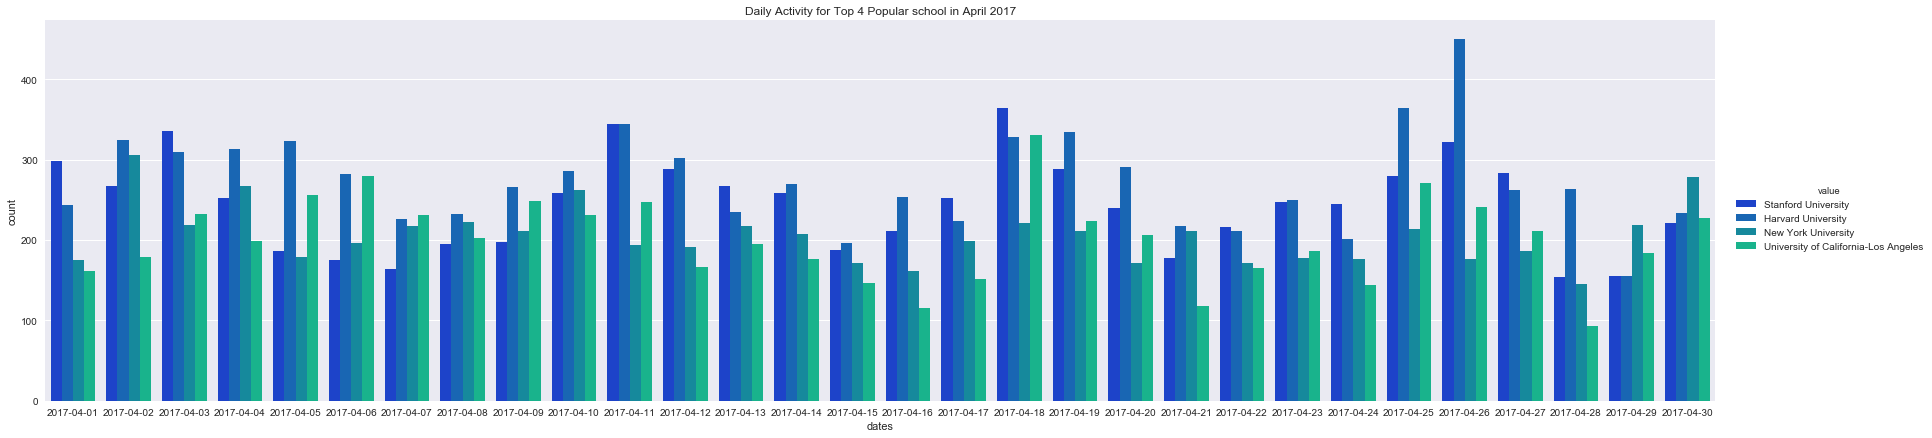

In [17]:
sns.factorplot('dates', data=sub_uni, kind='count', hue='value',palette ='winter', size=6,aspect = 4)
plt.title('Daily Activity for Top 4 Popular school in April 2017')

To get comparative analysis for Top 4 University create new dataset only for 4 university. As per below visualization its very clear that Howard University is top most and there is variance in daily engagement in all 4 University.But all distrubution are normal distribution.

Question 4. Pinning/Favoriting events are of importance to us at Schoold since they are often a sign of an engaged user, and allows us to gauge their specific interest in schools. Identify a single metric that can be used with this data to gauge performance of this feature. Ideally this is a metric that can be calculated from time to time to assess increased/decreased performance of this feature (i.e. with new app releases).
    
a. Calculate and report that metric for April 2017.

In [18]:
# Event wise groupby() review
eventAtt_dt.groupby(['event_name']).groups.keys()

card_pin = len(eventAtt_dt.groupby(['event_name']).groups['schoolCardPinningEvent'])
print(card_pin)
profile_pin = len(eventAtt_dt.groupby(['event_name']).groups['schoolProfilePinningEvent'])
print(profile_pin)

66837
48304


As per all types of Event daily Engagement visualization

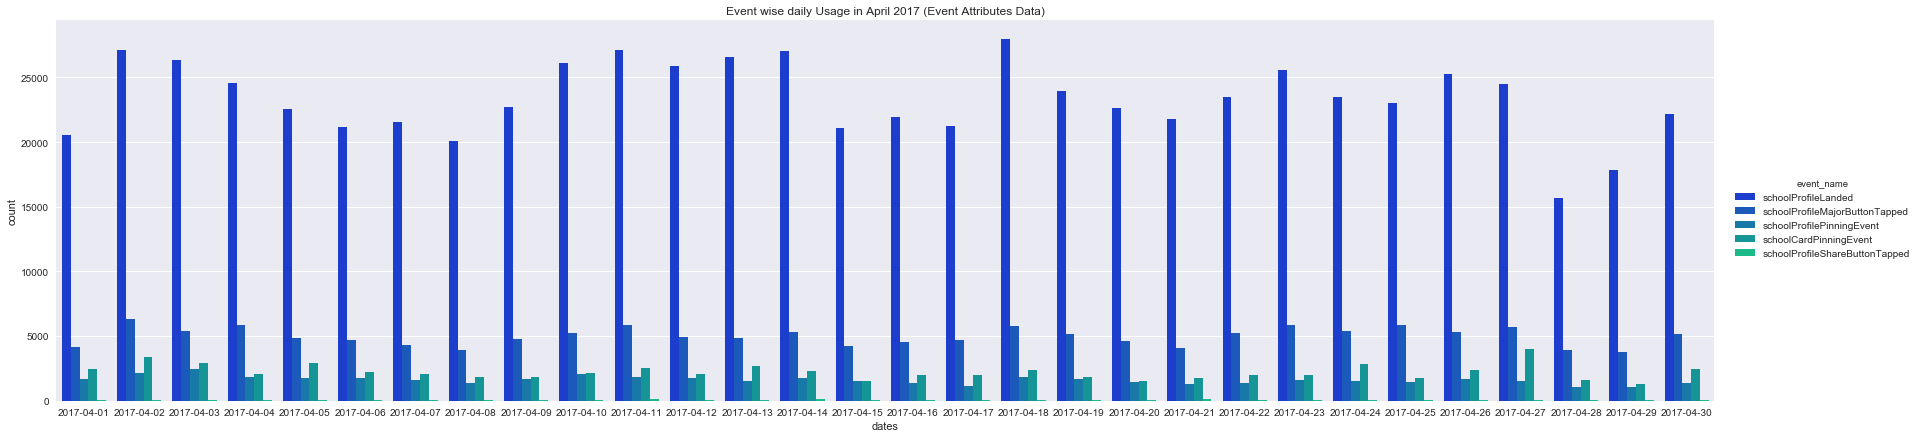

In [19]:
sns.factorplot('dates', data=eventAtt_dt, kind='count', hue='event_name',palette='winter', size = 6, aspect = 4)
plt.title('Event wise daily Usage in April 2017 (Event Attributes Data)')

Daily engagement activity as per event and total nth times in different visualization

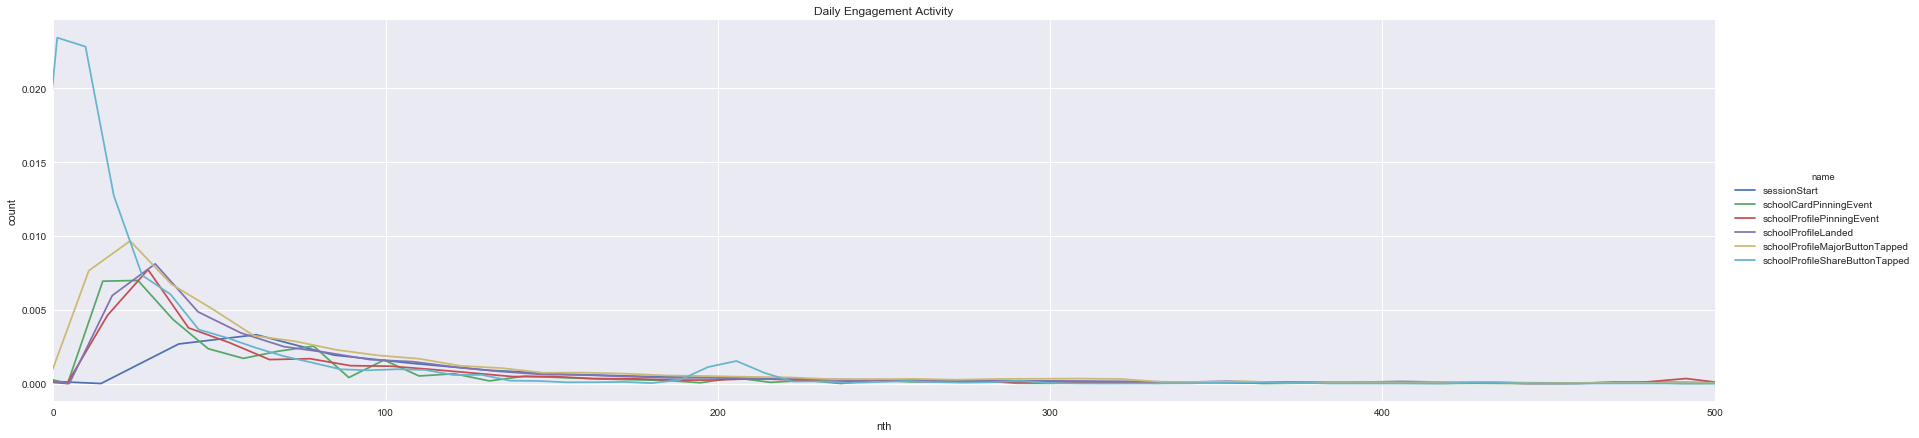

In [20]:
new_fig = sns.FacetGrid(event_dt,hue='name',aspect=4, size =6)
new_fig.map(sns.kdeplot,'nth')
new_fig.set(xlim=(0,500), ylabel='count', title='Daily Engagement Activity')
new_fig.add_legend()

Daily engagement activity as per event and total nth times in scatter visualization

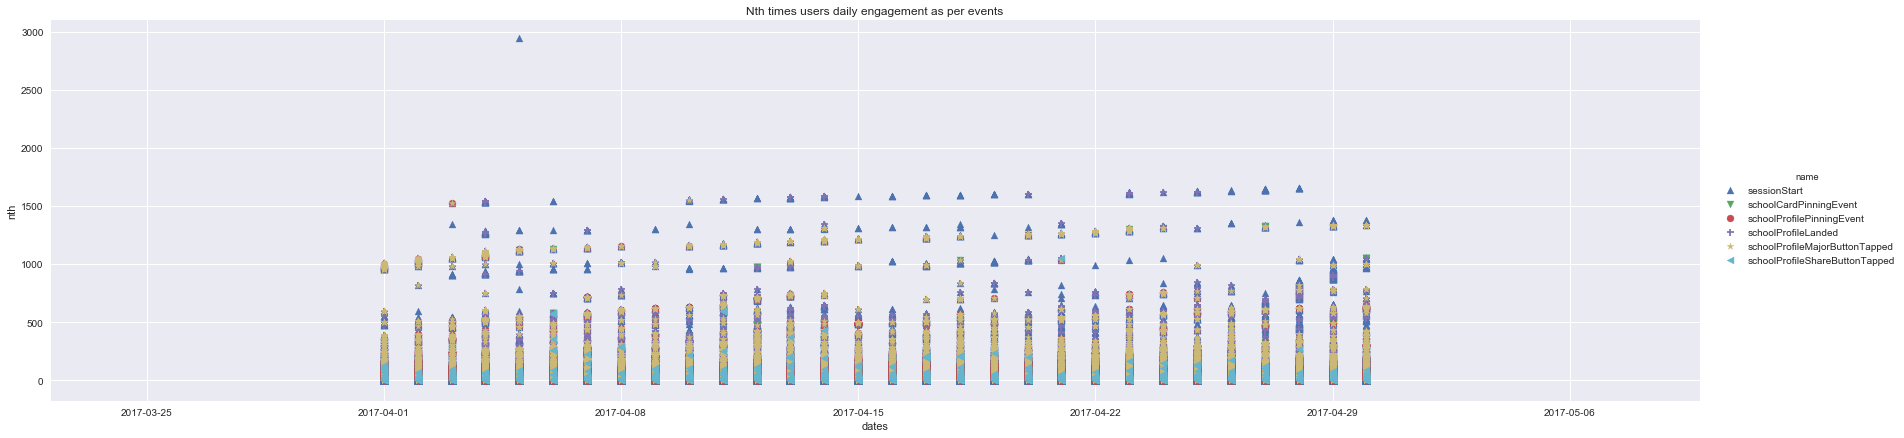

In [21]:
new_fig = sns.FacetGrid(event_dt,hue='name', aspect=4, size =6,hue_kws={"marker": ["^", "v", "o","+","*","<"]})
new_fig.map(plt.scatter,'dates','nth')
plt.title('Nth times users daily engagement as per events')
new_fig.add_legend()

In [4]:
event_dt['at'] = event_dt['at'].apply(lambda x : pd.to_datetime(str(x)))
event_dt['dates'] = event_dt['at'].dt.day

Create subset of data only relavent to pinning/ Favourite event to check Density of Engagement of specific users.

In [10]:
sub = eventAtt_dt[(eventAtt_dt.event_name == 'schoolProfilePinningEvent') | (eventAtt_dt.event_name == 'schoolCardPinningEvent') ]

In [ ]:
sns.factorplot('at', data= sub, kind='count', hue='event_name', size = 6, aspect = 4)
plt.title('Daily Engagement as per  Pinning/Favoriting events for April 2017')

In [5]:
sub_event = event_dt[(event_dt.name == 'schoolProfilePinningEvent') | (event_dt.name == 'schoolCardPinningEvent') ]

In [6]:
sub_event_indexed = sub_event.reindex(columns=['at', 'country', 'name', 'uuid', 'nth','dates'])

In [7]:
sub_event_indexed.head()

,at,country,name,uuid,nth,dates
3,2017-04-17 20:12:51,us,schoolCardPinningEvent,011700e9f19d9579164cbbfecaec48431df3bde9,1.0,17
4,2017-04-25 19:37:42,us,schoolProfilePinningEvent,011732c281f93c2e305252cb4e46551e4cfbe8dc,12.0,25
8,2017-04-08 22:48:43,us,schoolCardPinningEvent,0117975f779db998d6b7dcc0d2d2d9229bee1b8a,3.0,8
43,2017-04-03 21:36:17,us,schoolCardPinningEvent,011c7b1000c338c1062dc820561d1ce705f8205e,39.0,3
44,2017-04-10 00:36:01,us,schoolProfilePinningEvent,011c8b9cfc9e7358837fbbf8f66808a0d008b074,3.0,10


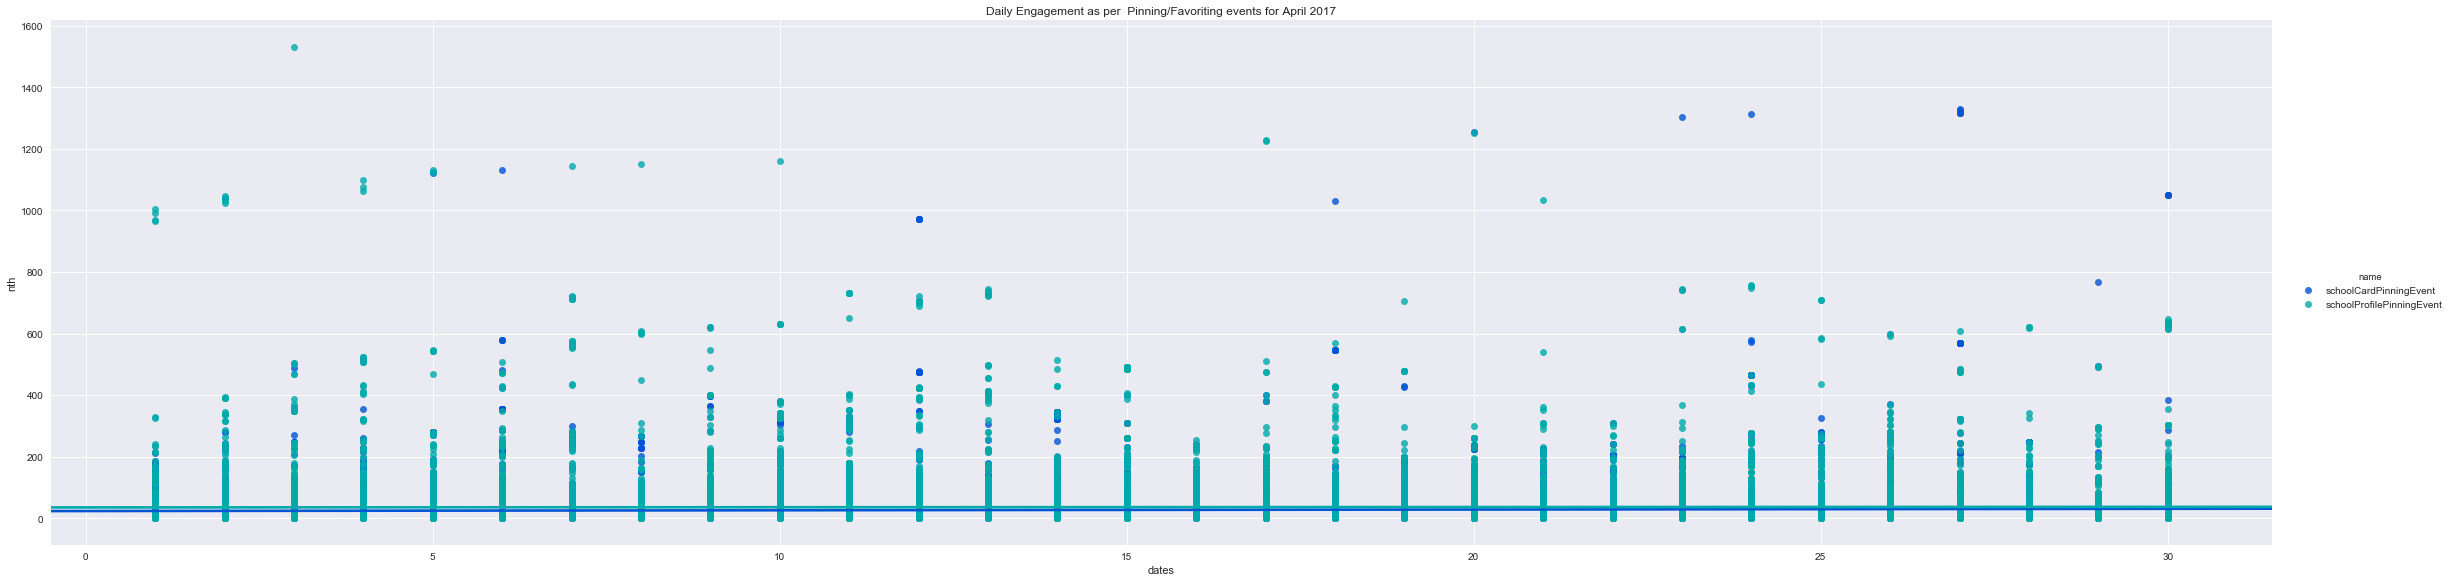

In [8]:
sns.lmplot('dates','nth' , hue='name', data=sub_event_indexed, palette='winter', size=8, aspect=4)
plt.title('Daily Engagement as per  Pinning/Favoriting events for April 2017')

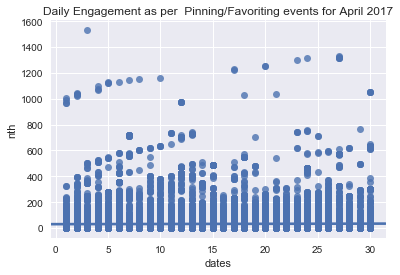

In [9]:
sns.regplot(x='dates',y='nth', data = sub_event_indexed)
plt.title('Daily Engagement as per  Pinning/Favoriting events for April 2017')

b. Justify using this metric and how you calculated it.

Created new subset of dataset only for this two events and measure it with everyday engagement ratio.

As above visualisation is Uniform distribution of constant density as per pinning /favourite event in month of April 2017. Also from visualization we can see everyday pinning from all users over regular user of the App to make easy understanding of the pattern of schoold app users.

Question 5. How users discover content in our app is important for us to track. Create a useful visualization that demonstrates how users are discovering school profiles.

a. What is the most common source and do you find this result surprising?

In [7]:
sub_val = eventAtt_dt[(eventAtt_dt.value == 'major')|(eventAtt_dt.value == 'homeExploreScreen')|(eventAtt_dt.value == 'curated')|(eventAtt_dt.value == 'homeScreen')|(eventAtt_dt.value == 'schoolSearch')|(eventAtt_dt.value == 'Occupation')|(eventAtt_dt.value == 'mySchools')|(eventAtt_dt.value == 'location') | (eventAtt_dt.value == 'deeplink') | (eventAtt_dt.value == 'geopoint')]

In [8]:
sub_val.head()

,at,event_name,field_name,uuid,value,dates
2,2017-04-01 00:00:00,schoolProfileLanded,parentType,5a52decac7dc03867868e8803ad103d683abeb84,mySchools,2017-04-01
8,2017-04-01 00:00:43,schoolProfileLanded,parentType,897722893493d35a5fd70ee988a4dd2d7e00639e,major,2017-04-01
10,2017-04-01 00:00:46,schoolProfileLanded,parentType,0b030d374afad75eab0972bfb057af8b468fce35,schoolSearch,2017-04-01
14,2017-04-01 00:00:47,schoolProfileLanded,parentType,f537456086664c4974e7d210a2a19d1e061ee46c,major,2017-04-01
25,2017-04-01 00:01:17,schoolProfileLanded,parentType,0b70e5408c2d90919496d813b6eb409cb5655e04,schoolSearch,2017-04-01


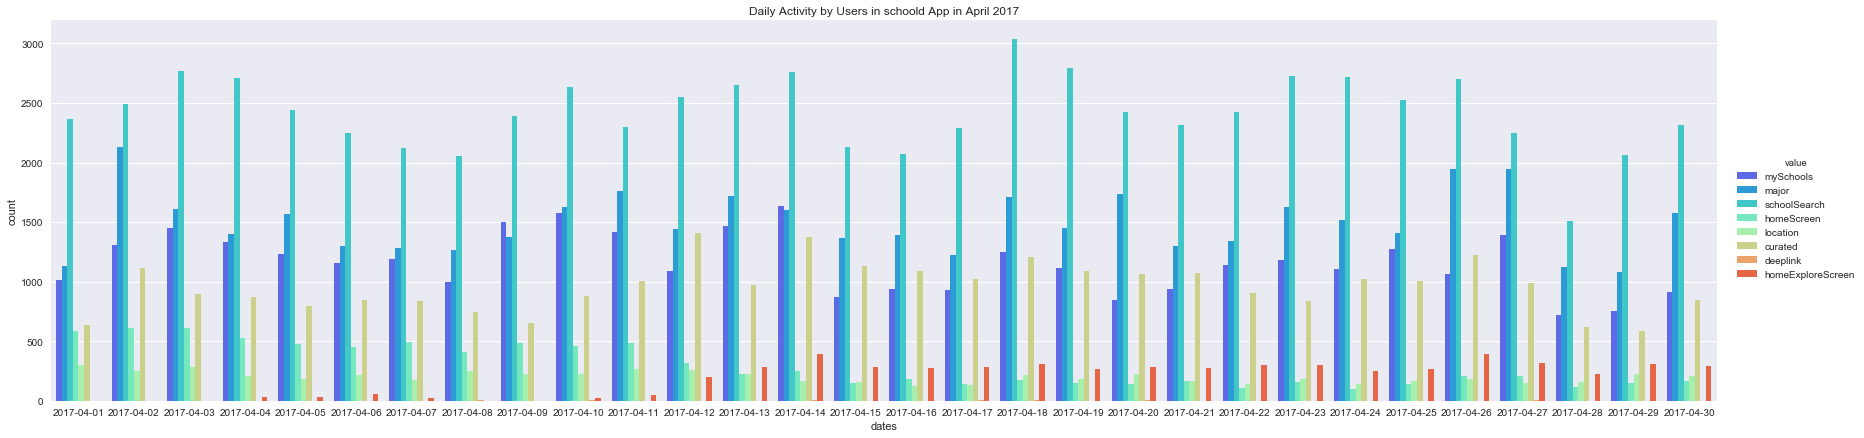

In [9]:
sns.factorplot('dates', data=sub_val, kind='count', hue='value',palette ='rainbow', size=6,aspect = 4)
plt.title('Daily Activity by Users in schoold App in April 2017')

From the above visualisation student use home Explorer screen schoolSearch button the most then 2nd higest is  major and then myschool.
Surprisingly homeExplorerScreen usage was none but more middle of April onwards increase where as by location is decrease. 
Still as per below field_name wise  analysis represents as by school name direct 
search is most higest usage because by schoolName is higher then ParentType.

Most comon Usage pattern :: [Search]- school by name -> [Explorer] - schoolSearch->major->mySchools->Curated->homeScreen->homeExplorerScreen

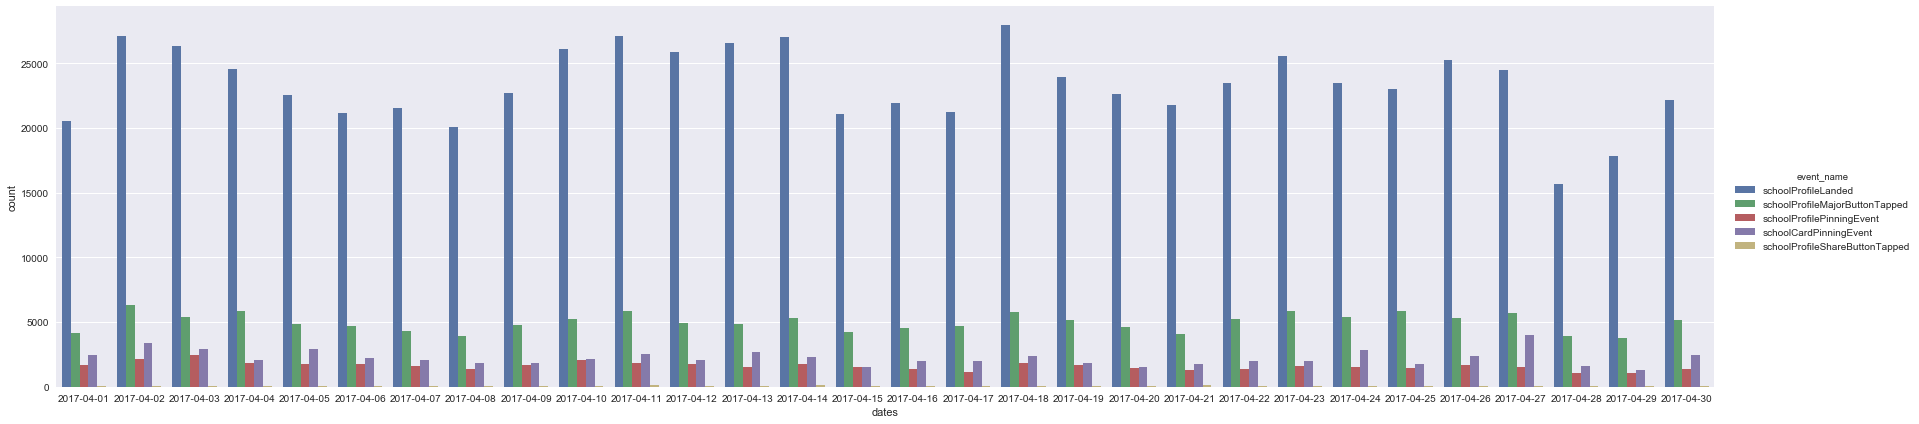

In [37]:
sns.factorplot('dates', data=eventAtt_dt, kind='count', hue='event_name', size = 6, aspect = 4)

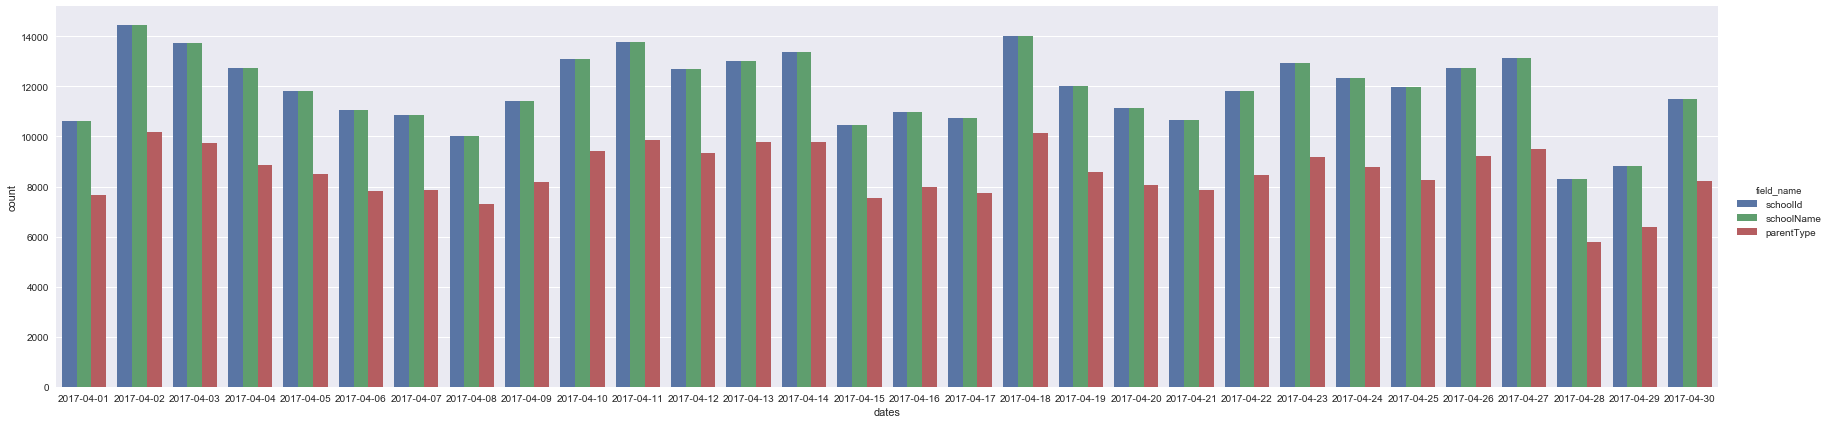

In [38]:
sns.factorplot('dates', data=eventAtt_dt, kind='count', hue='field_name', size = 6, aspect = 4)

b. How would you use this finding to make a recommendation to the Product Team for new features and/or feature enhancements? How would you track the success of your recommendations?

From Above analysis and findings I would like to put my input in Explorer page there is tab name Viewbooks which is misleading and not precises by name,
So I recommend to use name which gives clear understanding to student where that tab lead to them. On same screen there is Trending tab too which leads to same page.
As deeplink not been use so can replace with some other corelated feature to make more easy information gatering.
Still to suggest more features or enhancement need to explore product as well as application and lots of other data to give solid finding to support my suggestions.
To keep track on recommendations I prefer timely followup and take their view about my suggestions and discussion with product team and observe process very closely.


Question 6. What data cleaning did you have to do during this exercise if any? Was there anything new that you learned while completing this challenge? 
How much time did you spend on the challenge all together?

There is -1 in values which need to be taken care as well as from datetimestamp date need to get separate to make presentation clean as well as reading data @speed too. Also for matric analysis need to for pinning by every new user per day to see business performance need to change datatype of nth column to make it compitable to represents. In event Attribute checked is there any null value in value column which consider most in analysis. I spend roughly 2 to 3 hours the most not spend enough time to create report more accurate.
Hope you do not mind and please ignore if there is any misrepresentation.

I hope I understand questions in right manner.It was really great to work on schoold April 2017 dataset.

Thank you,
Shruti